# Importing Needed Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline
pd.set_option('display.max_columns', None)

# Reading CSV file as weather_df and making date_time column as index of dataframe

In [2]:
#weather_df = pd.read_csv('/content/dehli.csv', parse_dates=['date_time'], index_col='date_time')
#weather_df.head()

In [3]:
#weather_df.drop(['location'],axis=1,inplace=True)

In [5]:
weather_df = pd.read_csv('kanpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,2,11,12,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,3,12,13,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,4,12,13,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,5,12,13,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,05:28 PM,5,14,14,14,19,0,54,0.0,1016,11,10,302,11


In [6]:
weather_df.tail(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-01 19:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,05:27 PM,6,13,13,13,21,53,61,0.0,1019,13,8,74,11
2020-01-01 20:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,05:27 PM,6,12,13,12,22,39,61,0.0,1020,13,9,81,11
2020-01-01 21:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,05:27 PM,6,12,13,12,23,25,62,0.0,1020,13,10,88,11
2020-01-01 22:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,05:27 PM,6,12,13,12,21,26,63,0.0,1020,13,10,85,11
2020-01-01 23:00:00,15,11,0.0,7.1,4,1,37,11:13 AM,11:00 PM,06:57 AM,05:27 PM,6,12,12,12,20,27,64,0.0,1020,12,10,83,10


# Checking columns in our dataframe

In [7]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

## Now shape

In [8]:
weather_df.shape

(96432, 24)

In [9]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


# Checking is there any null values in dataset

In [10]:
weather_df.isnull().any()

,0
maxtempC,False
mintempC,False
totalSnow_cm,False
sunHour,False
uvIndex,False
uvIndex.1,False
moon_illumination,False
moonrise,False
moonset,False
sunrise,False


### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [11]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


# Shape of new dataframe

In [12]:
weather_df_num.shape

(96432, 10)

# Columns in new dataframe

In [13]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'sunHour',
       'HeatIndexC', 'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

## Ploting all the column values

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

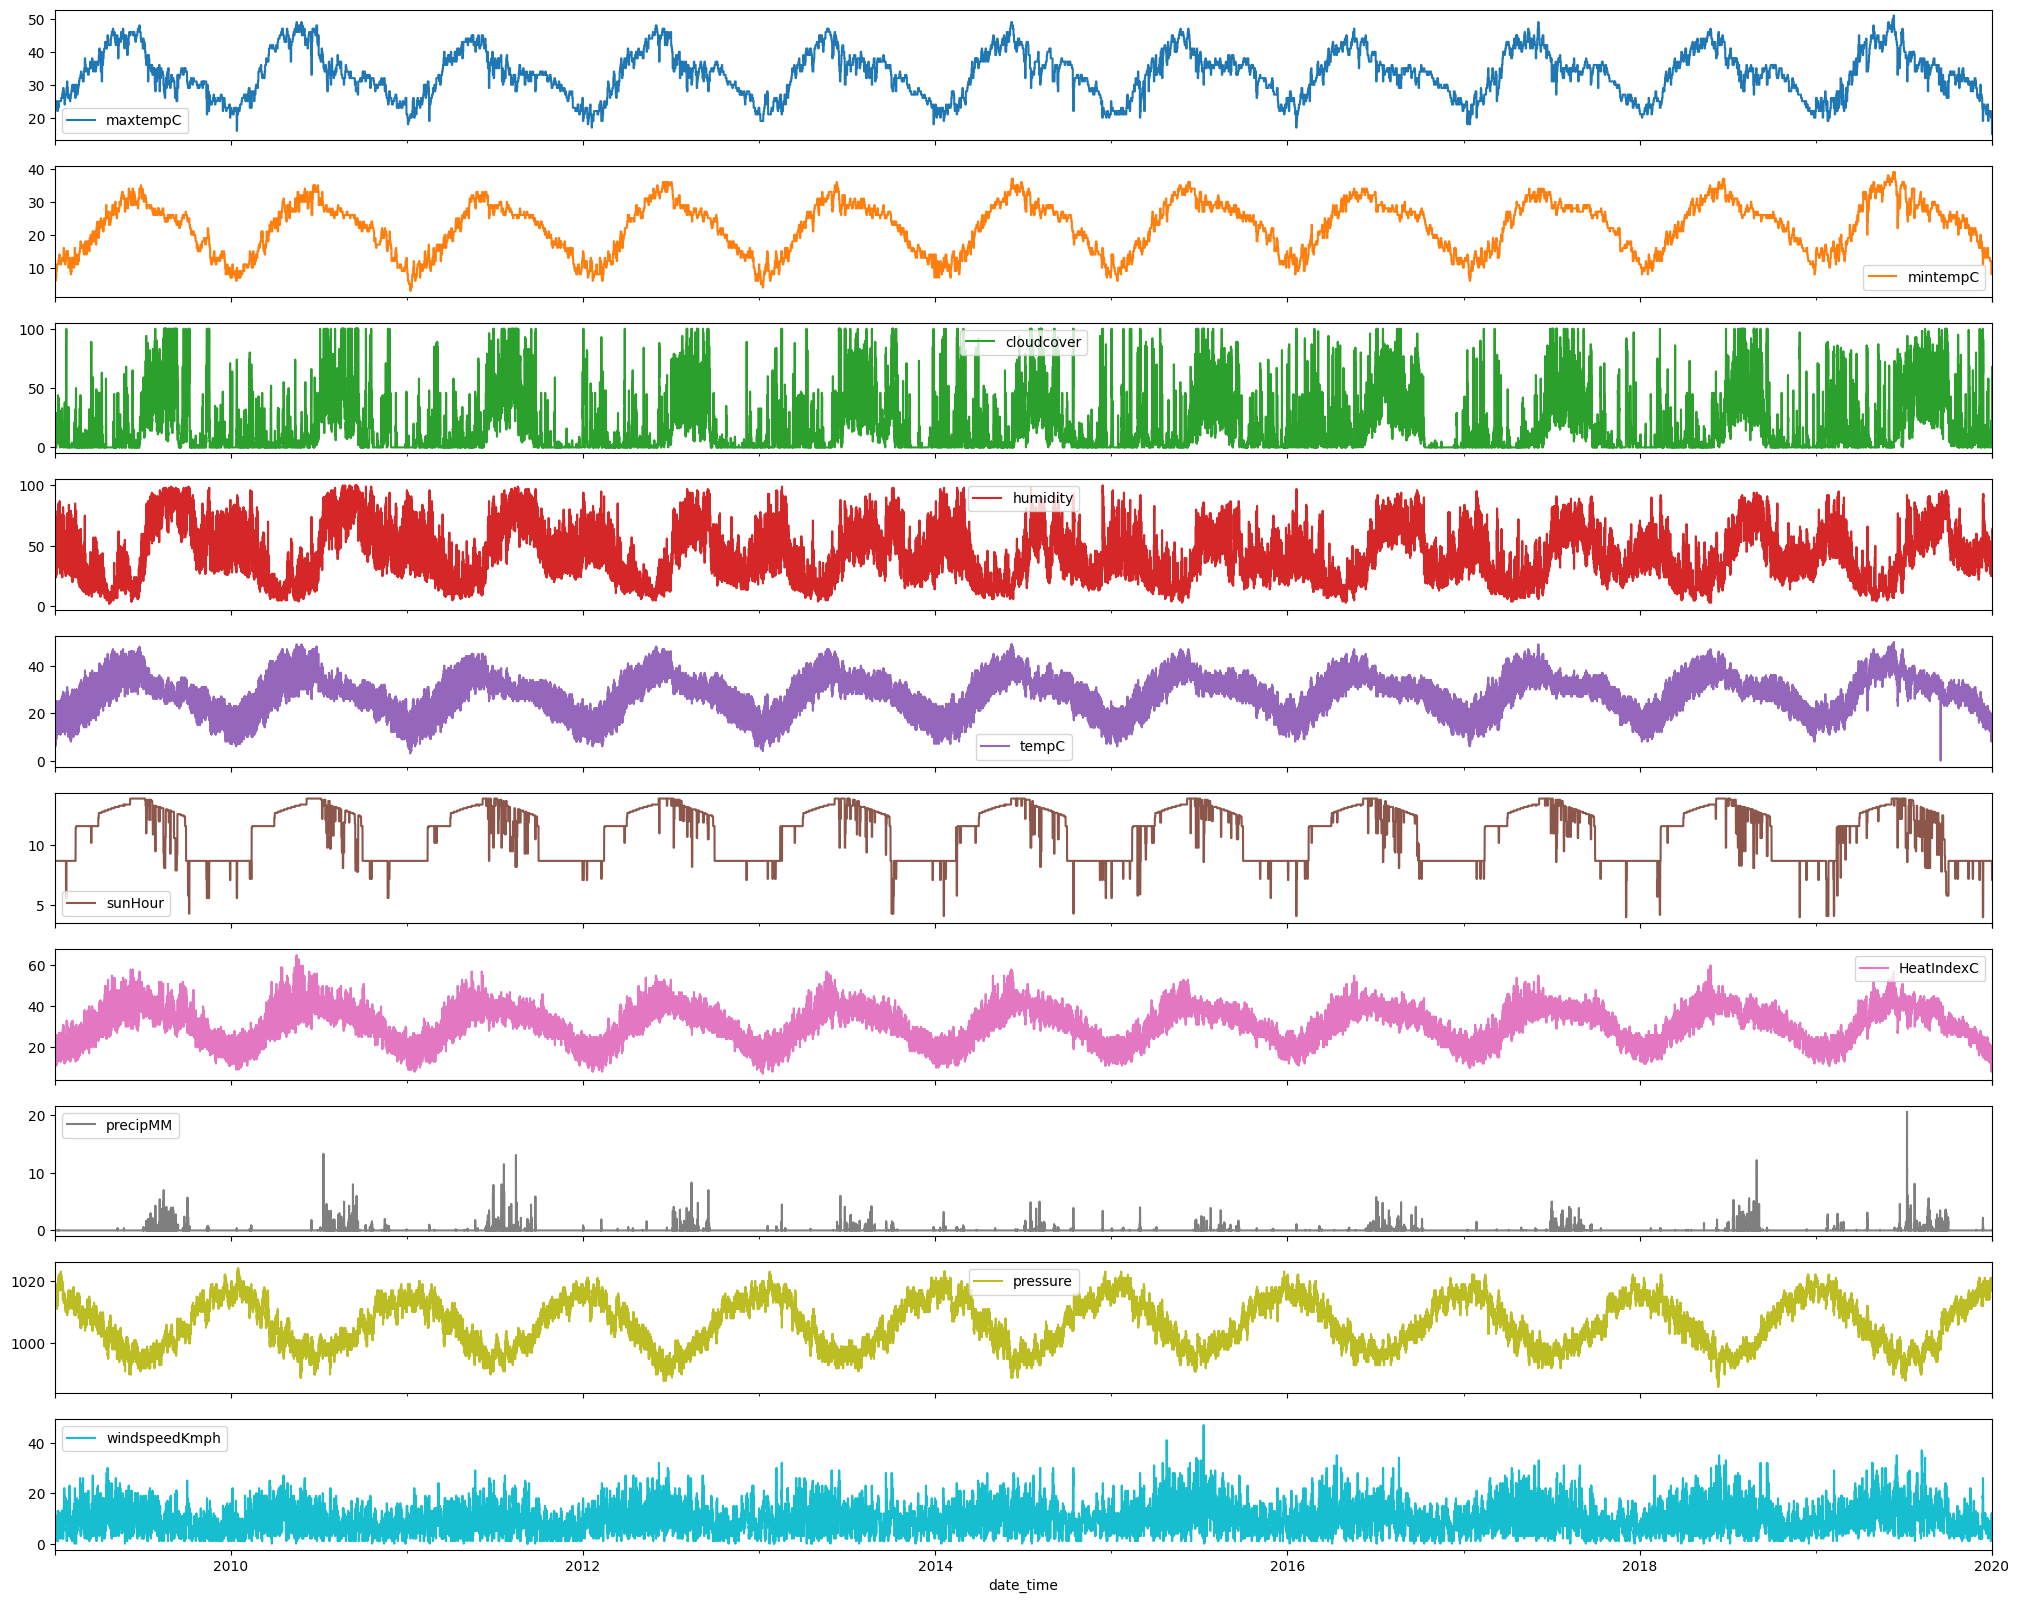

In [14]:
weather_df_num.plot(subplots=True, figsize=(25,20))

# Ploting all the column values for 1 year

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

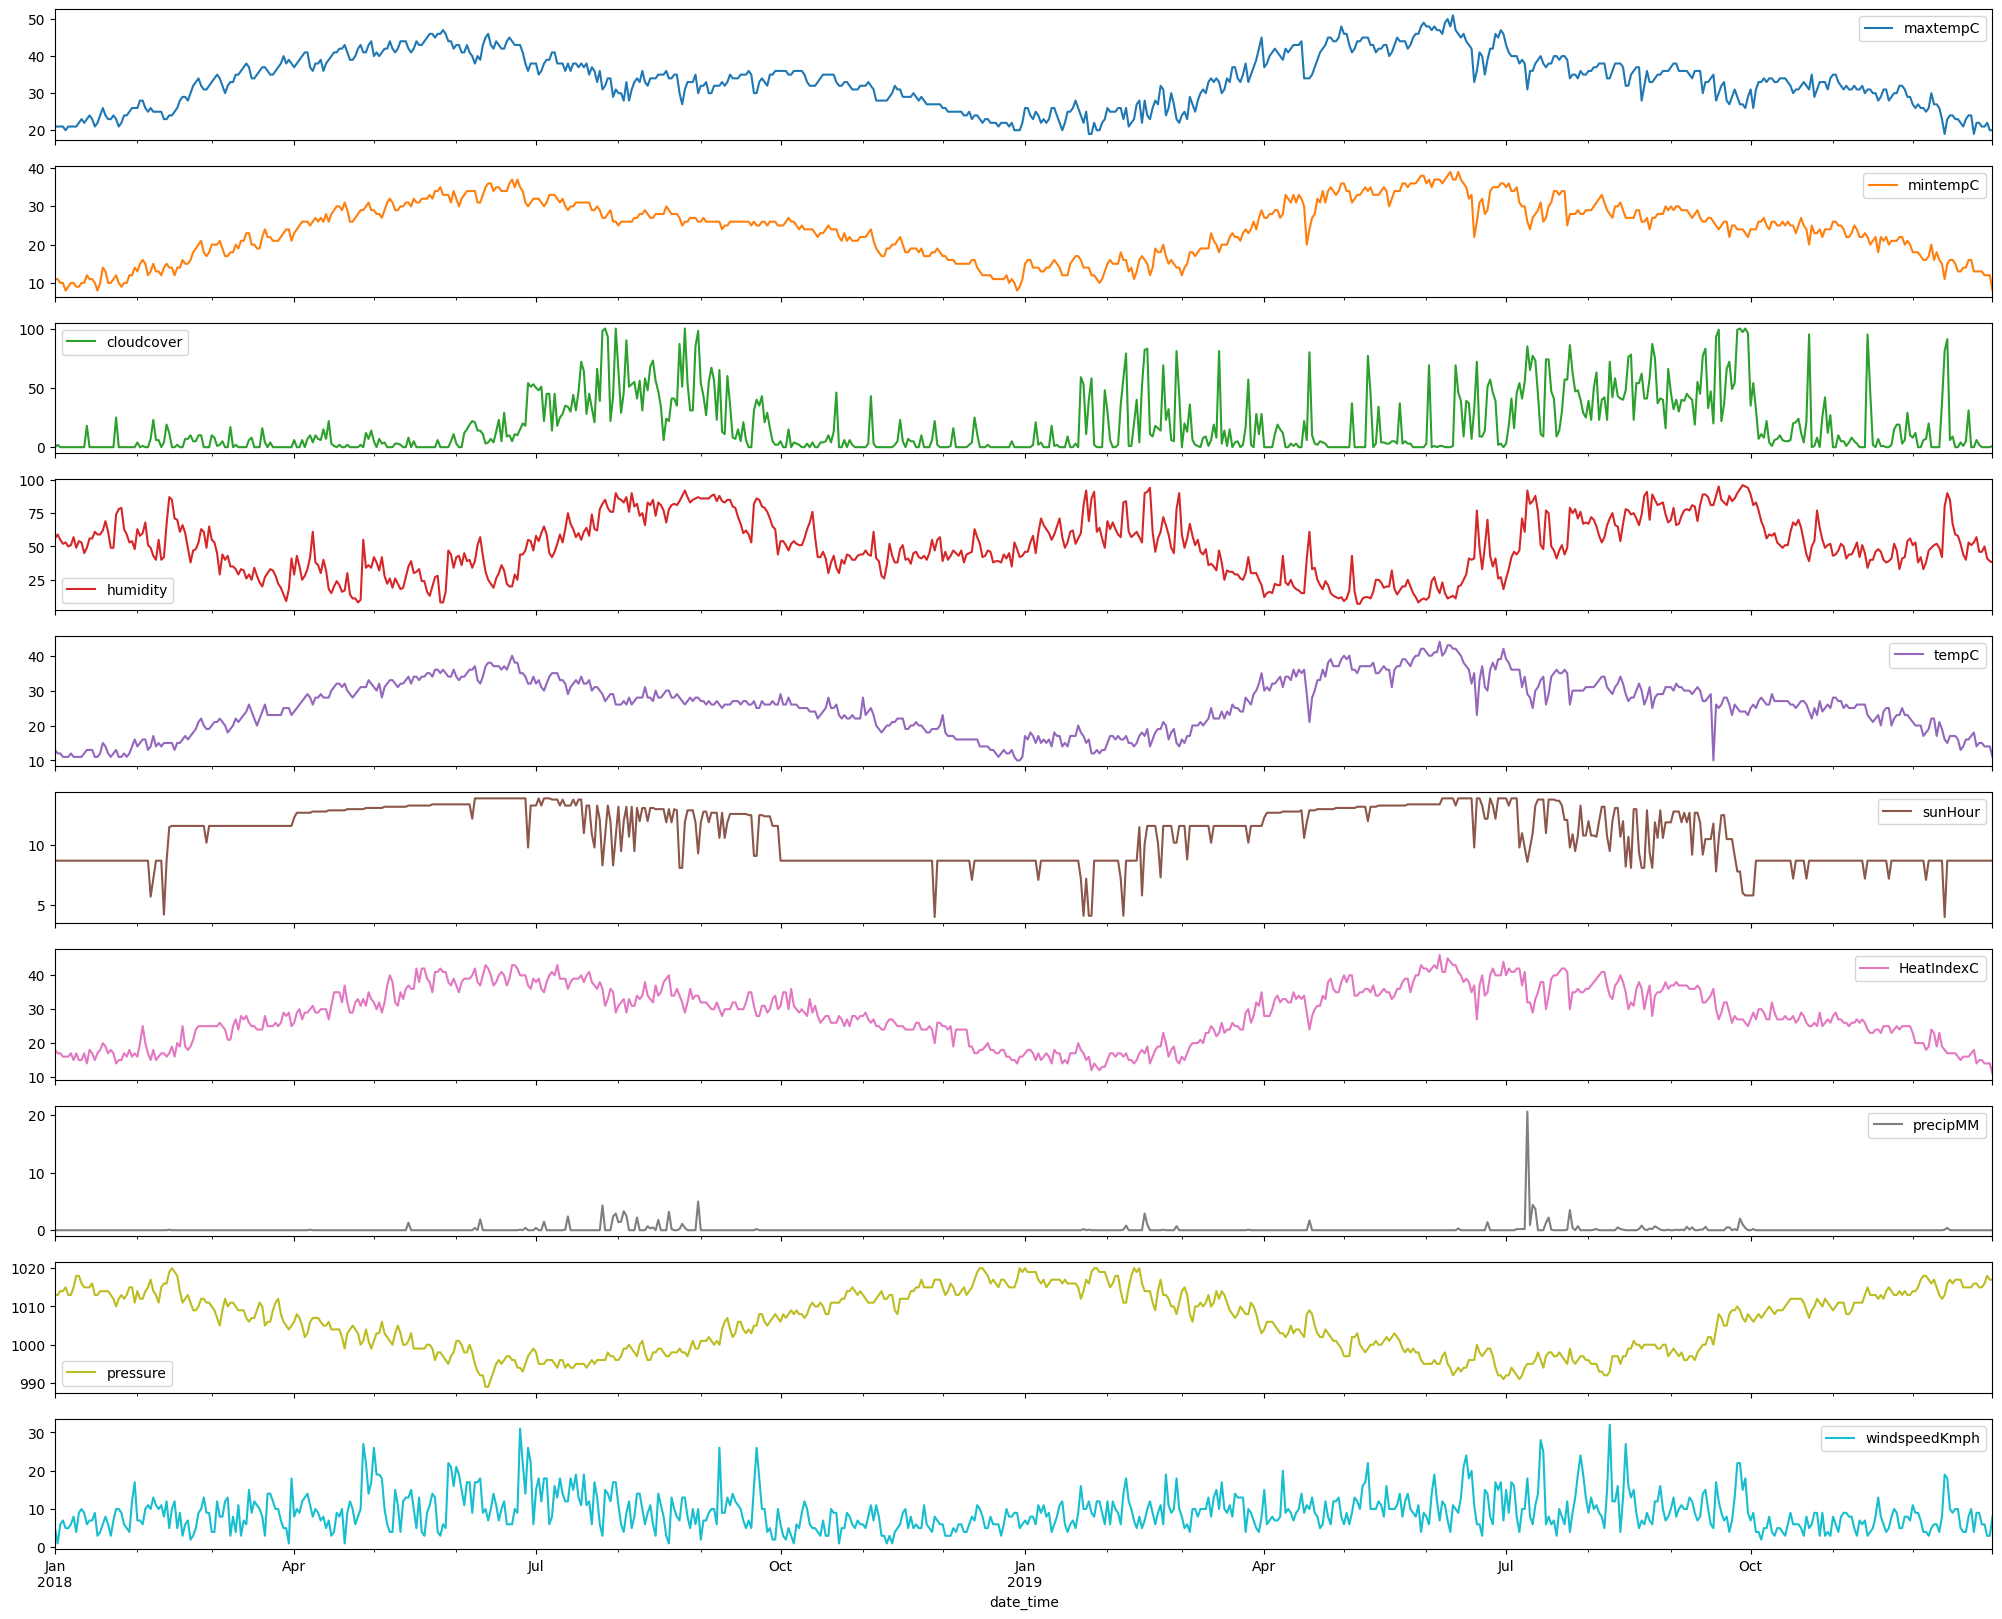

In [17]:
weather_df_num['2018':'2019'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'sunHour'}>],
       [<Axes: title={'center': 'HeatIndexC'}>,
        <Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>],
       [<Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

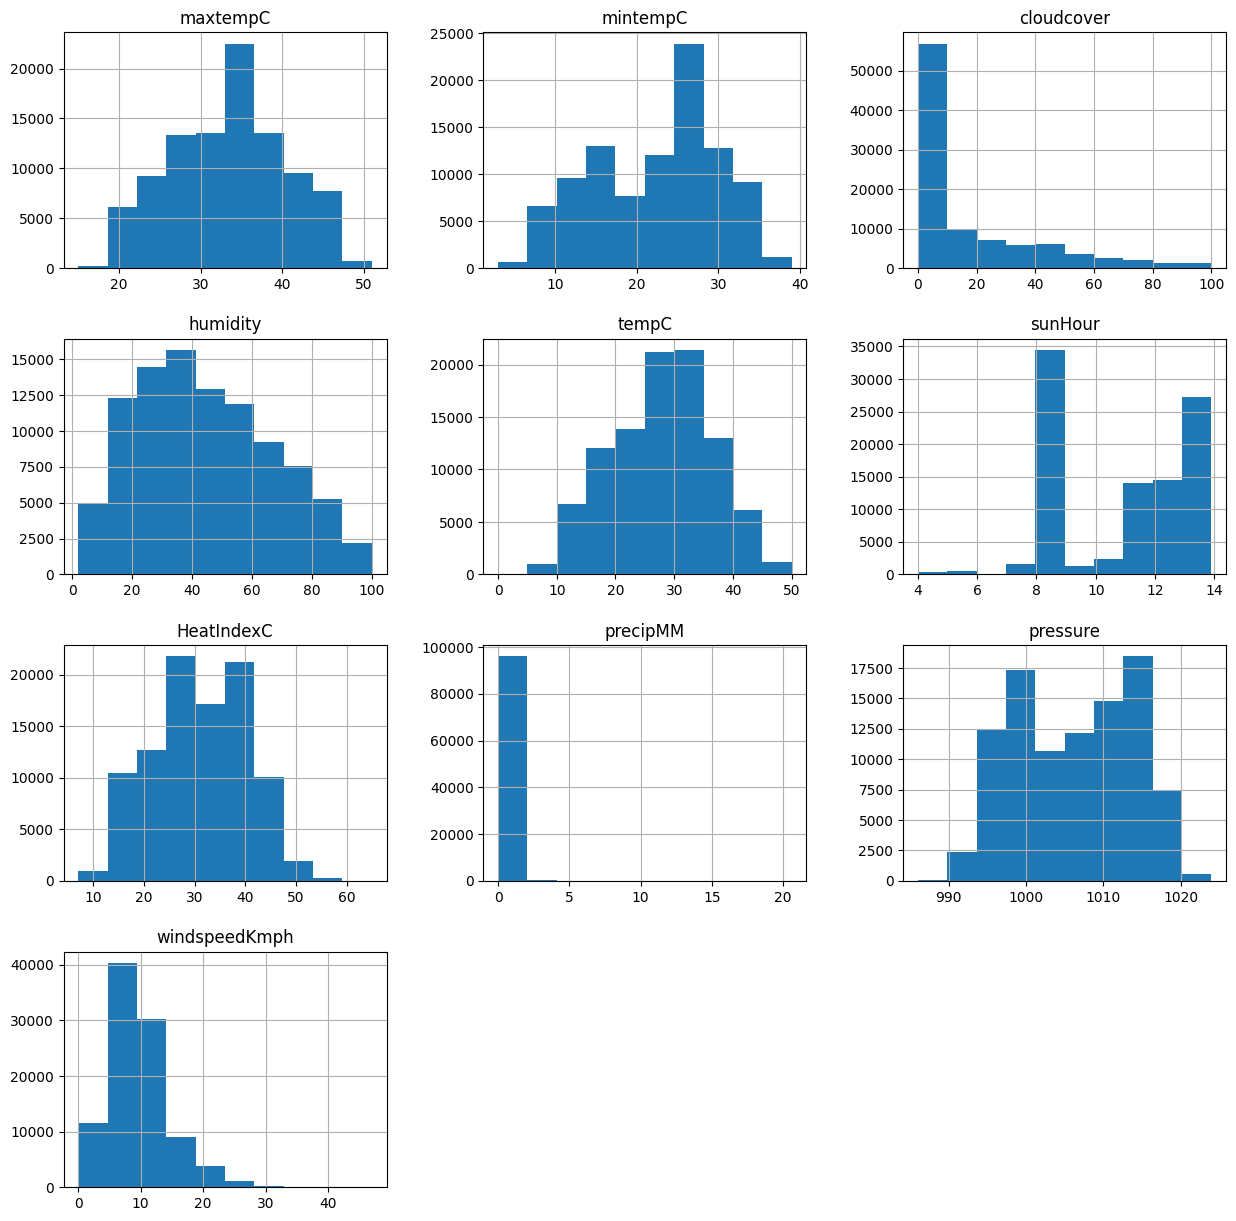

In [18]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [19]:
weth=weather_df_num['2018':'2019']
weth.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,,
2018-01-01 00:00:00,21,11,0,56,13,8.7,18,0.0,1013,5
2018-01-01 01:00:00,21,11,0,61,12,8.7,18,0.0,1013,5
2018-01-01 02:00:00,21,11,0,66,11,8.7,17,0.0,1013,5
2018-01-01 03:00:00,21,11,0,71,11,8.7,16,0.0,1013,4
2018-01-01 04:00:00,21,11,0,69,11,8.7,17,0.0,1014,5


In [20]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num

### Now our dataset is prepared and it is ready to be fed to the model for training.it’s time to split the dataset into training and testing.

In [21]:
train_X,test_X,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [22]:
train_X.shape

(77145, 9)

In [23]:
train_y.shape

(77145,)

### train_x has all the features except temperature and train_y has the corresponding temperature for those features. in supervised machine learning we first feed the model with input and associated output and then we check with a new input.

In [24]:
train_y.head()

,tempC
date_time,
2012-03-13 07:00:00,22
2009-11-05 21:00:00,21
2017-10-11 22:00:00,30
2019-06-08 11:00:00,47
2019-03-06 05:00:00,18


# Multiple Linear Regression

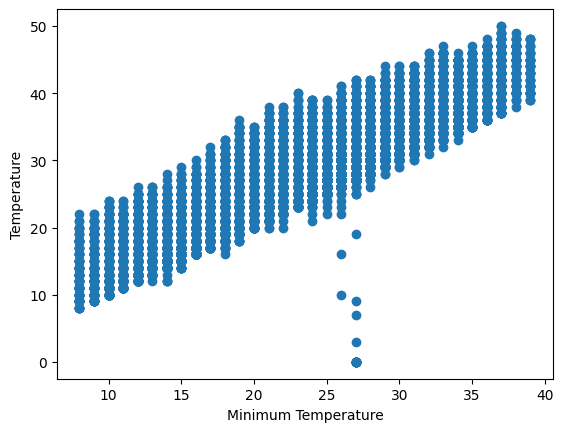

In [25]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

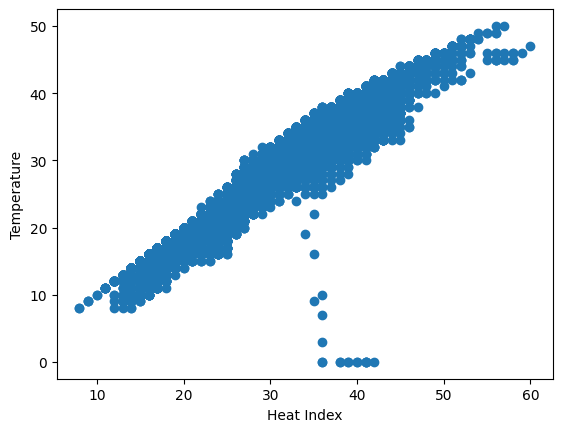

In [26]:
plt.scatter(weth.HeatIndexC, weth.tempC)
plt.xlabel("Heat Index")
plt.ylabel("Temperature")
plt.show()

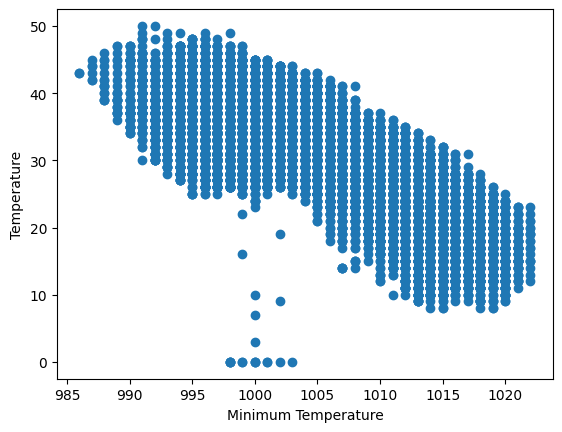

In [27]:
plt.scatter(weth.pressure, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

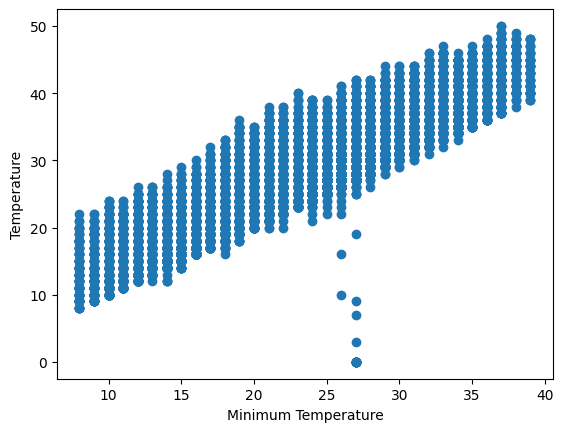

In [28]:
plt.scatter(weth.mintempC, weth.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

In [29]:
model=LinearRegression()
model.fit(train_X,train_y)

LinearRegression()

In [30]:
prediction = model.predict(test_X)

In [31]:
#calculating error
np.mean(np.absolute(prediction-test_y))

np.float64(1.2004735794096797)

In [32]:
print('Variance score: %.2f' % model.score(test_X, test_y))

Variance score: 0.96


In [33]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction,'diff':(test_y-prediction)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.89,-0.89
2015-11-04 20:00:00,25,24.57,0.43
2015-09-21 09:00:00,34,35.08,-1.08
2017-02-16 11:00:00,28,25.22,2.78
2012-07-21 01:00:00,28,28.04,-0.04
...,...,...,...
2019-03-30 09:00:00,37,33.55,3.45
2015-11-12 12:00:00,32,30.36,1.64
2019-12-31 05:00:00,8,9.13,-1.13


# Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_X,train_y)

DecisionTreeRegressor(random_state=0)

In [35]:
prediction2=regressor.predict(test_X)
np.mean(np.absolute(prediction2-test_y))

np.float64(0.5630130830784121)

In [36]:
print('Variance score: %.2f' % regressor.score(test_X, test_y))

Variance score: 0.98


In [37]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.0,0.0
2015-11-04 20:00:00,25,24.0,1.0
2015-09-21 09:00:00,34,34.0,0.0
2017-02-16 11:00:00,28,27.0,1.0
2012-07-21 01:00:00,28,28.0,0.0
...,...,...,...
2019-03-30 09:00:00,37,32.0,5.0
2015-11-12 12:00:00,32,32.0,0.0
2019-12-31 05:00:00,8,9.0,-1.0


# Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_X,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [39]:
prediction3=regr.predict(test_X)
np.mean(np.absolute(prediction3-test_y))

np.float64(0.4749165453503998)

In [40]:
print('Variance score: %.2f' % regr.score(test_X, test_y))

Variance score: 0.99


In [41]:
for i in range(len(prediction3)):
  prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'Actual':test_y,'Prediction':prediction3,'diff':(test_y-prediction3)})

,Actual,Prediction,diff
date_time,,,
2013-07-10 08:00:00,34,33.92,0.08
2015-11-04 20:00:00,25,24.84,0.16
2015-09-21 09:00:00,34,34.25,-0.25
2017-02-16 11:00:00,28,27.00,1.00
2012-07-21 01:00:00,28,27.99,0.01
...,...,...,...
2019-03-30 09:00:00,37,32.79,4.21
2015-11-12 12:00:00,32,31.91,0.09
2019-12-31 05:00:00,8,8.81,-0.81


In [42]:
from sklearn.metrics import r2_score

# Calculating R2-score for Multiple Linear Regression

In [43]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction ) )

Mean absolute error: 1.20
Residual sum of squares (MSE): 2.51
R2-score: 0.96


# Calculating R2-score for Decision Tree Regression

In [44]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction2 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction2 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction2 ) )

Mean absolute error: 0.56
Residual sum of squares (MSE): 1.12
R2-score: 0.98


# Calculating R2-score for Random Forest Regression

In [45]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction3 - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction3 - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,prediction3 ) )

Mean absolute error: 0.47
Residual sum of squares (MSE): 0.63
R2-score: 0.99
